<img src="mmu_logo.png" style="height: 80px;" align=left>  

# Learning Objectives

Towards the end of this lesson, you should be able to:
- perform preliminary investigation on dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

# Read data

In [2]:
# read the csv file

df = pd.read_csv('data.csv')

In [3]:
# check dimensionality
# your answer here...

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
# get the last 5 records

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# list all the columns in the dataset

df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## Checking data types (attribute types)
**It's important to check data types to make sure they are correct. Sometimes a numeric column can be treated as an object type because there are junk text mixed in the data...**

In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

**Try change Outlet_Establishment_Year to float**

In [7]:
# errors="coerce" will make sure any non-numeric will be converted into NaN

df['Outlet_Establishment_Year'] = pd.to_numeric(df['Outlet_Establishment_Year'], errors='coerce') # lecturer solution
df['Outlet_Establishment_Year'] = pd.to_numeric(df['Outlet_Establishment_Year'], downcast='float')

In [8]:
# check the output of Outlet_Establishment_Year

print(df['Outlet_Establishment_Year'])

0       1999.0
1       2009.0
2       1999.0
3       1998.0
4       1987.0
         ...  
8518    1987.0
8519    2002.0
8520    2004.0
8521    2009.0
8522    1997.0
Name: Outlet_Establishment_Year, Length: 8523, dtype: float32


In [9]:
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype(str)

df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year     object
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Missing data
**To check if there is any missing data:**

In [10]:
# check the number of records with NaN

# len(df[df.isna().any(axis=1)]) # axis=1 is vertical/column

df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
# total up the records with NaN

len(df[df.isna().any(axis=1)])

0

In [13]:
# Remove rows with NaN

df = df.dropna() # drop all rows that have any NaN values

len(df[df.isna().any(axis=1)])

0

In [14]:
# fill NA with 100
# no point to fill Na bc already dropped
df.fillna(100, inplace=True)

# Removing duplicated Data

In [15]:
print("Total duplicated rows: ", sum(df.duplicated()))

# drop duplicates

df = df.drop_duplicates()

Total duplicated rows:  0


In [17]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987.0,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997.0,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987.0,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004.0,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,1845.5976


# Measuring Central Tendency (Mean, median, mode)

In [18]:
# All in one except "mode", also including quartile range, standard deviation and min max.
df.describe() # by default only returns numeric type columns, use the parameter include="all" to include all dtypes

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,4650.000000,4650.000000,4650.000000,4650.000000
mean,12.898675,0.060700,141.716328,2272.037489
std,4.670973,0.044607,62.420534,1497.964740
min,4.555000,0.000000,31.490000,69.243200
25%,8.770000,0.025968,94.409400,1125.202000
50%,12.650000,0.049655,142.979900,1939.808300
75%,17.000000,0.088736,186.614150,3111.616300
max,21.350000,0.188323,266.888400,10256.649000


In [21]:
# To get the mean, median and mode of a feature, you can use pandas .mean() .median() or .mode() function
# your answer here...

print('Mean: ', df['Item_Outlet_Sales'].mean())
print('Median: ', df['Item_Outlet_Sales'].median())
print('Mode: ', df['Item_Outlet_Sales'].mode().tolist())

Mean:  2272.0374886021527
Median:  1939.8083000000001
Mode:  [1342.2528, 1438.128]


In [24]:
# These measures can also be useful in descriptive analytics, for instance

# Get the mean/average sales in 2009 by item_type
filtered = df[df["Outlet_Establishment_Year"] == '2009.0'] # access specific value in column
filtered

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,556.6088
16,NCB42,11.800,Low Fat,0.008596,Health and Hygiene,115.3492,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,1621.8888
31,NCS17,18.600,Low Fat,0.080829,Health and Hygiene,96.4436,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,2741.7644
32,FDP33,18.700,Low Fat,0.000000,Snack Foods,256.6672,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,3068.0064
...,...,...,...,...,...,...,...,...,...,...,...,...
8506,DRF37,17.250,Low Fat,0.084676,Soft Drinks,263.1910,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,3944.8650
8511,FDF05,17.500,Low Fat,0.026980,Frozen Foods,262.5910,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,4207.8560
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,1571.2880
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.7588,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,858.8820


In [26]:
filtered = df[df["Outlet_Establishment_Year"] == '2009.0']
display(filtered.groupby(["Item_Type"]).agg({"Item_Outlet_Sales": "mean"}))

,Item_Outlet_Sales
Item_Type,
Baking Goods,1780.368782
Breads,2022.404489
Breakfast,1874.670867
Canned,1867.714110
Dairy,2083.981362
Frozen Foods,1995.641420
Fruits and Vegetables,1951.642279
Hard Drinks,2247.528955
Health and Hygiene,1876.649134


# Visualizing distribution of data
**Simple plots can be done fast using pandas .plot(), alternatively seaborn is also quite good**

## Histogram

In [27]:
df["Item_Outlet_Sales"]

0       3735.1380
1        443.4228
2       2097.2700
4        994.7052
5        556.6088
          ...    
8517    3608.6360
8518    2778.3834
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 4650, dtype: float64

<AxesSubplot:ylabel='Frequency'>

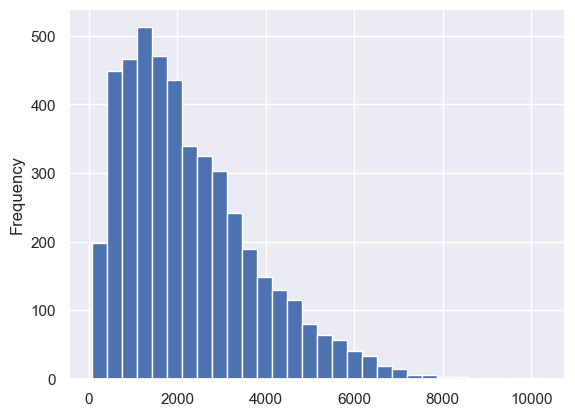

In [28]:
# your codes here...
df["Item_Outlet_Sales"].plot(kind="hist", bins=30)

## Histogram + density plot

<AxesSubplot:>

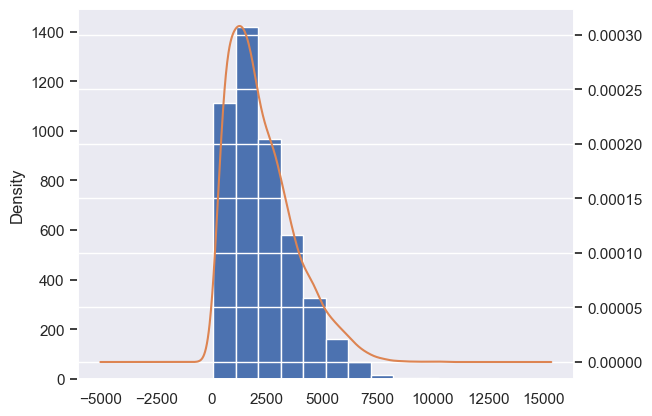

In [29]:
ax = df["Item_Outlet_Sales"].plot(kind="hist")
df["Item_Outlet_Sales"].plot(kind="kde", ax=ax, secondary_y=True)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

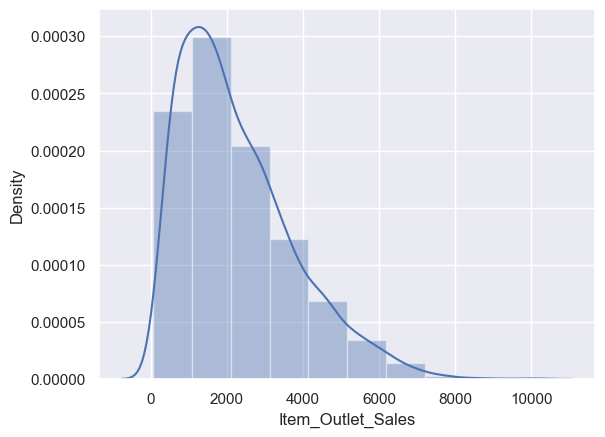

In [30]:
# Use Seaborn for the histogram + density plot
sns.distplot(df["Item_Outlet_Sales"], bins=10)

### We can quantify skewness by:

In [32]:
# your codes here... 
print("Skewness: ", df["Item_Outlet_Sales"].skew())

Skewness:  1.0056043567501671


### Transformation to reduce skewness
- Common transformations are log, square root, or cube root to reduce positive skewness
- If it is negatively skewed, you can use log, cube root or square transformation

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness:  0.2560332156151097


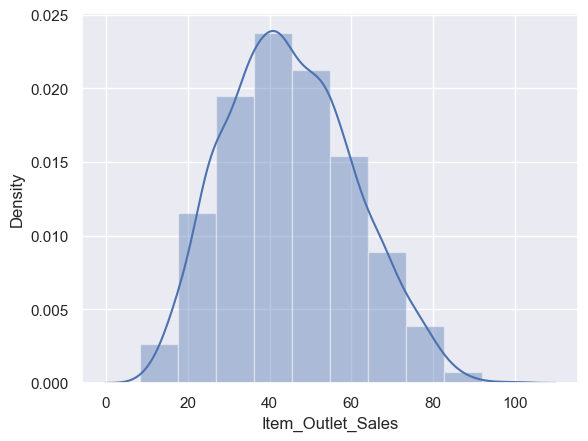

In [33]:
sqrt_transform = np.sqrt(df["Item_Outlet_Sales"])

# your answer here...
sns.distplot(sqrt_transform, bins=10)
print("Skewness: ", sqrt_transform.skew())

## Q-Q Plot / Normality test

In [40]:
import statsmodels.api as sm
from scipy import stats
from scipy.stats import normaltest # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

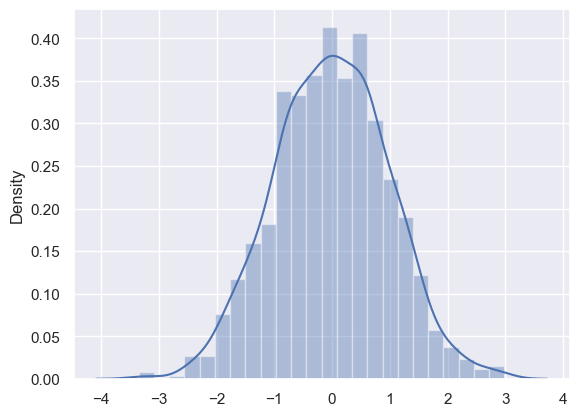

In [41]:
test = np.random.normal(0,1, 1000) # generate random data

# displot here...
sns.distplot(test)

#### QQ plot to visualize normality

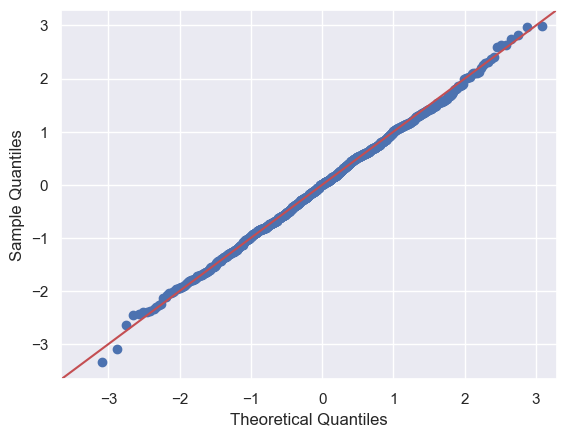

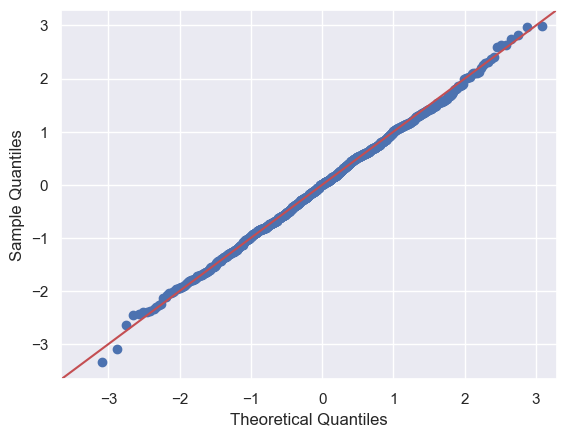

In [42]:
# your codes here...
sm.qqplot(test, line='45')

#### Alternatively, a normality test

In [44]:
# normality test, it's more efficient to do a normality test rather than plot q-q plot for all features in your dataset, especially when your data has a lot features.
k2, p = normaltest(test)
alpha = 1e-3
print("p = {:g}".format(p)) # a big p value means it's close to normal

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0.970699
The null hypothesis cannot be rejected


## Bar plot

<AxesSubplot:>

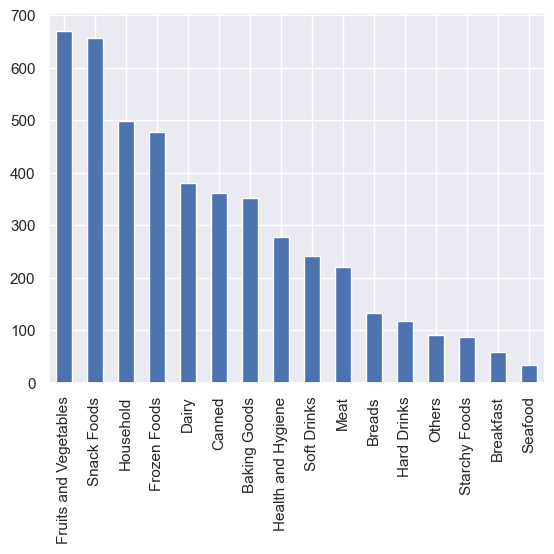

In [45]:
# Plot a bar plot for Item_Type
df['Item_Type'].value_counts().plot(kind='bar')

## Box Plot

<AxesSubplot:>

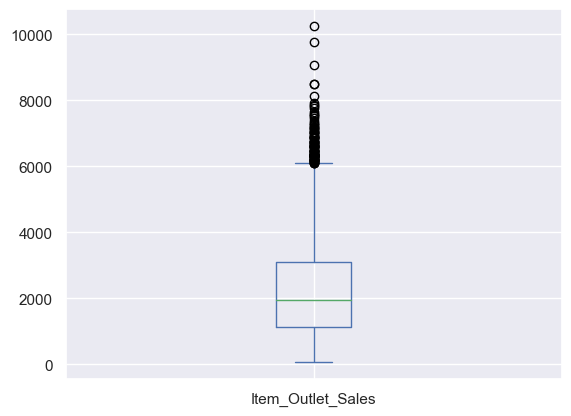

In [46]:
# Plot a boxplot for Item_Outlet_Sales
df[['Item_Outlet_Sales']].plot(kind='box')

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

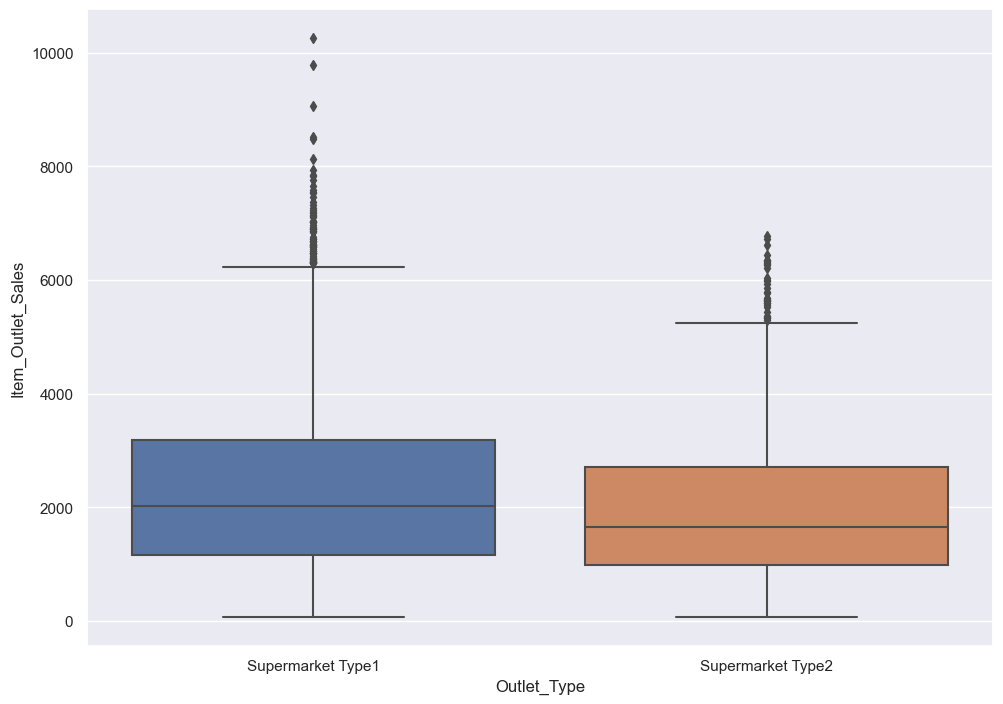

In [47]:
# Plot a boxplot with Outlet_Type as category (x-axis)

fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.boxplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales', ax=ax)

## Correlation plot

<AxesSubplot:>

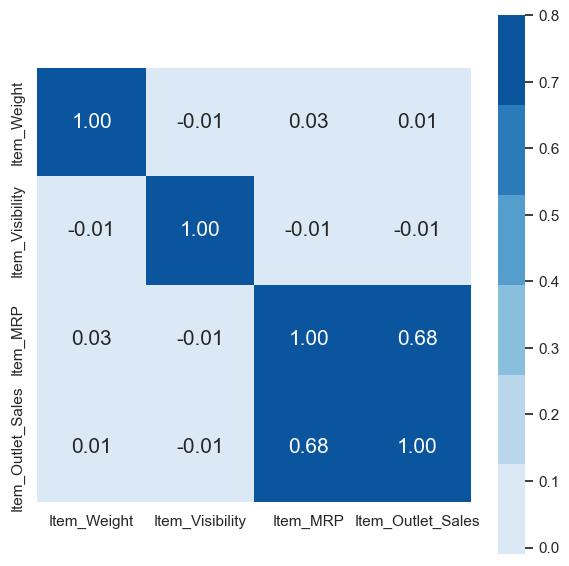

In [48]:
corr = df.corr()

plt.figure(figsize=(7,7))

# Plot a heatmap for df using Seaborn

sns.heatmap(corr, vmax=.8, square=True, annot=True, fmt='.2f', 
            annot_kws={'size':15}, cmap=sns.color_palette("Blues"))


## Scatterplot


<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

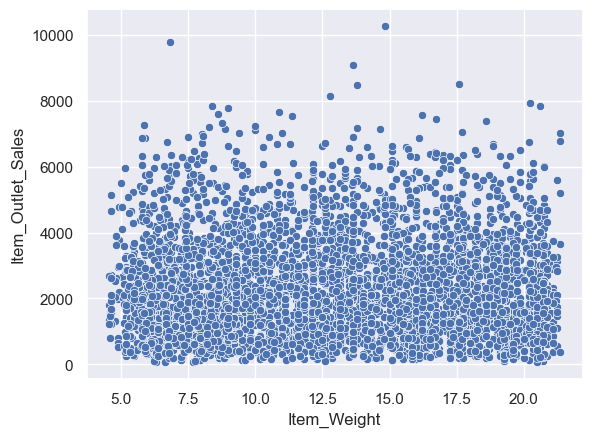

In [49]:
# Plot a scatter plot for Item_Weight vs. Item_Outlet_Sales
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=df)

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

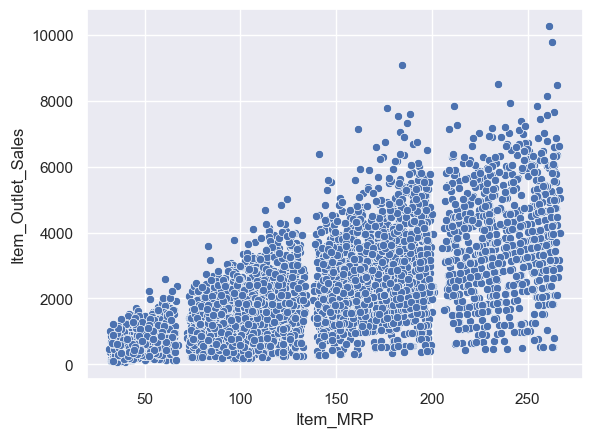

In [50]:
# Plot a scatter plot for Item_MRP vs. Item_Outlet_Sales
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df)